## Data generator

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [8]:
np.random.seed(42)

In [9]:
n = 50000  ## number of timestamps

In [10]:
def createRow(n, classes):
    base = np.sin(np.linspace((np.random.rand(3)),(np.random.rand(3) + np.array([10,15,7])),n))
    
    if classes[0] > 0:
        base[np.random.randint(0,n), 0] += 2
    if classes[1] > 0:
        base[np.random.randint(0,n), 1] -= 2
    if classes[2] > 0:
        x = np.random.randint(0,n-5)
        base[x:x+4,2] = 0
    if classes[3] > 0:
        x = np.random.randint(0,n-10)
        base[x:x+8,1] += 1.5
    if classes[4] > 0:
        x = np.random.randint(0,n-7)
        base[x:x+6,0] += 1.5
        base[x:x+6,2] -= 1.5
        
    base += np.random.rand(*base.shape)*.2
    
    return base

In [11]:
xl, yl = [], []
for _ in range(n):
    cl = np.random.rand(5)<.25
    xl.append(createRow(np.random.randint(40,60), cl))
    yl.append(cl)

### How it looks like

[False False False False  True]


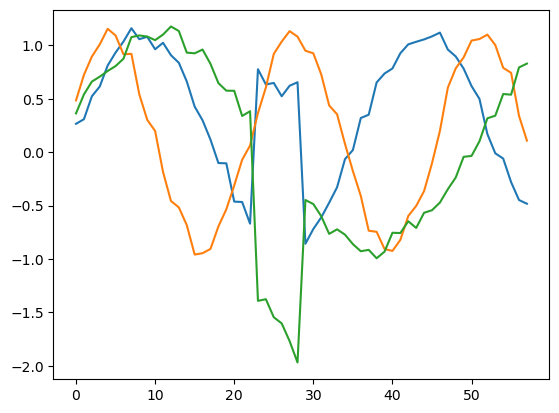

[False False False  True  True]


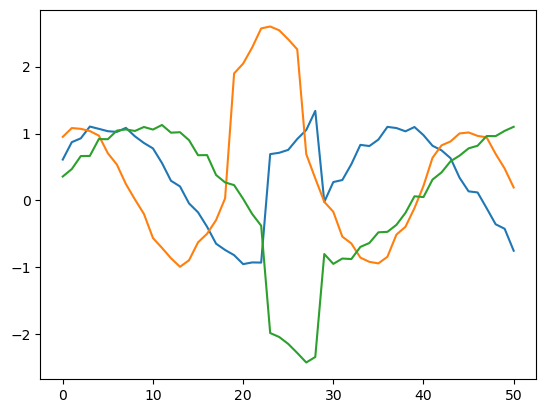

[False False False False False]


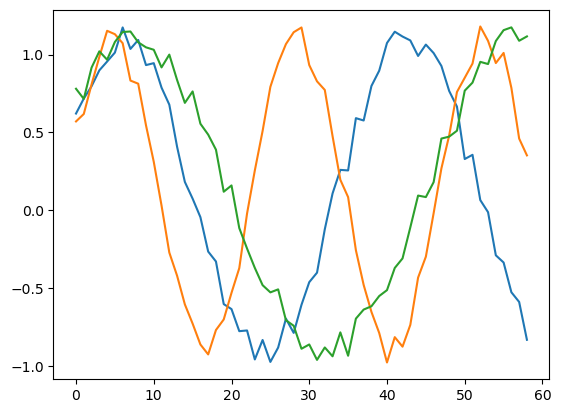

[ True False False False  True]


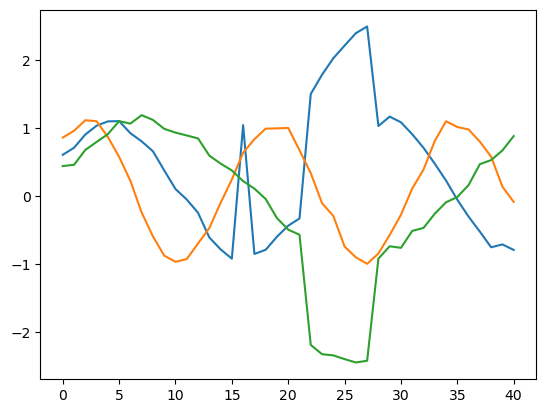

[False  True False False False]


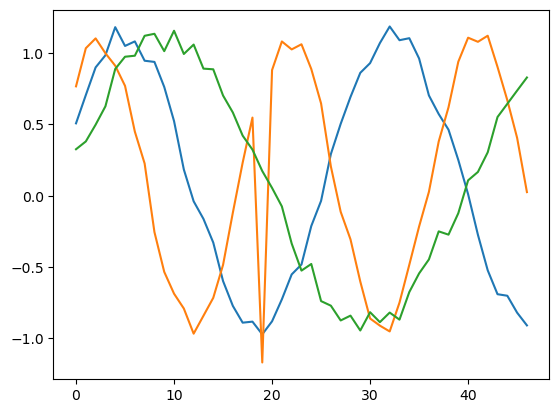

In [12]:
## 3 different lines are 3 sensors
## each True/False is responsible for one defect pattern occurance
for i in range(5):
    plt.plot(xl[i])
    print(yl[i])
    plt.show()

In [14]:
## save to files

with open("./data/samples", "wb") as fp:
    pickle.dump(xl, fp)
    
with open("./data/labels", "wb") as fp:
    pickle.dump(yl, fp)